In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ocsvm_linear_df = pd.read_csv('./ocsvm-linear.csv')
ocsvm_poly_df = pd.read_csv('./ocsvm-poly.csv')
ocsvm_rbf_df = pd.read_csv('./ocsvm-rbf.csv')
ocsvm_sigmoid_df = pd.read_csv('./ocsvm-sigmoid.csv')

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))

ax[0, 0].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['accuracy'])
ax[0, 0].set_title("Accuracy")
ax[0, 0].set_xlabel('nu')
ax[0, 1].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['precision'])
ax[0, 1].set_title("Precision")
ax[0, 1].set_xlabel('nu')
ax[1, 0].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['recall'])
ax[1, 0].set_title("Recall")
ax[1, 0].set_xlabel('nu')
ax[1, 1].plot(ocsvm_linear_df['nu'], ocsvm_linear_df['f1'])
ax[1, 1].set_title("F1")
ax[1, 1].set_xlabel('nu')

fig.tight_layout()
fig.suptitle("OCSVM Linear Kernel")
fig.show()

In [ ]:
ocsvm_sigmoid_df = ocsvm_sigmoid_df.sort_values(by=['gamma', 'nu'])
X, Y = ocsvm_sigmoid_df['gamma'].to_numpy(), ocsvm_sigmoid_df['nu'].to_numpy()
X = np.unique(X)
Y = np.unique(Y)

Z = ocsvm_sigmoid_df['accuracy'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Accuracy')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_sigmoid_df['precision'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Precision')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_sigmoid_df['recall'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('Recall')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

Z = ocsvm_sigmoid_df['f1'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.title('F1')
plt.xlabel('gamma')
plt.ylabel('nu')
plt.show()

In [ ]:
ocsvm_rbf_df = ocsvm_rbf_df.sort_values(by=['nu', 'gamma'])
ocsvm_rbf_df_filtered = ocsvm_rbf_df.drop(ocsvm_rbf_df[(ocsvm_rbf_df.nu >= 0.1) | (ocsvm_rbf_df.gamma >= 1.0)].index)

X, Y = ocsvm_rbf_df_filtered['gamma'].to_numpy(), ocsvm_rbf_df_filtered['nu'].to_numpy()
X = np.sort(np.unique(X)) 
Y = np.sort(np.unique(Y))

Z = ocsvm_rbf_df_filtered['accuracy'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('nu')
plt.savefig('ocsvm-accuracy.pdf')
plt.show()

Z = ocsvm_rbf_df_filtered['precision'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('nu')
plt.savefig('ocsvm-precision.pdf')
plt.show()

Z = ocsvm_rbf_df_filtered['recall'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 11))
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('nu')
plt.savefig('ocsvm-recall.pdf')
plt.show()

# CROP USELESS AREAS (WHERE SCORE IS TOO LOW)
Z = ocsvm_rbf_df_filtered['f1'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('nu')
plt.savefig('ocsvm-f1.pdf')
plt.show()

In [ ]:
gmm_df = pd.read_csv('./gmm.csv')

In [ ]:
gmm_df = gmm_df.sort_values(by=['quantile', 'components'])
# gmm_df_filtered = gmm_df.drop(gmm_df[(gmm_df.nu >= 0.1) | (gmm_df.gamma >= 1.0)].index)
gmm_df_filtered = gmm_df

X, Y = gmm_df_filtered['components'].to_numpy(), gmm_df_filtered['quantile'].to_numpy()
X = np.sort(np.unique(X)) 
Y = np.sort(np.unique(Y))

Z = gmm_df_filtered['accuracy'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('components')
plt.xticks(range(1, 21, 3))
plt.ylabel('quantile')
plt.savefig('gmm-accuracy.pdf')
plt.show()

Z = gmm_df_filtered['precision'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 11))
plt.colorbar()
plt.xlabel('components')
plt.xticks(range(1, 21, 3))
plt.ylabel('quantile')
plt.savefig('gmm-precision.pdf')
plt.show()

Z = gmm_df_filtered['recall'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 11))
plt.colorbar()
plt.xlabel('components')
plt.xticks(range(1, 21, 3))
plt.ylabel('quantile')
plt.savefig('gmm-recall.pdf')
plt.show()

# CROP USELESS AREAS (WHERE SCORE IS TOO LOW)
Z = gmm_df_filtered['f1'].to_numpy().reshape((Y.size, X.size))

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('components')
plt.xticks(range(1, 21, 3))
plt.ylabel('quantile')
plt.savefig('gmm-f1.pdf')
plt.show()

In [59]:
kde_gaussian_df = pd.read_csv('./kde_gaussian.csv')

In [62]:
def plot_kde(df):

    df = df.sort_values(by=['quantile', 'bandwidth'])
    # gmm_df_filtered = gmm_df.drop(gmm_df[(gmm_df.nu >= 0.1) | (gmm_df.gamma >= 1.0)].index)
    df_filtered = df

    X, Y = df_filtered['bandwidth'].to_numpy(), df_filtered['quantile'].to_numpy()
    X = np.sort(np.unique(X)) 
    Y = np.sort(np.unique(Y))

    Z = df_filtered['accuracy'].to_numpy().reshape((Y.size, X.size))

    plt.contourf(X, Y, Z)
    plt.colorbar()
    plt.xlabel('bandwidth')
    plt.ylabel('quantile')
    plt.savefig('kde-accuracy.pdf')
    plt.show()

    Z = df_filtered['precision'].to_numpy().reshape((Y.size, X.size))

    plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 11))
    plt.colorbar()
    plt.xlabel('bandwidth')
    plt.ylabel('quantile')
    plt.savefig('kde-precision.pdf')
    plt.show()

    Z = df_filtered['recall'].to_numpy().reshape((Y.size, X.size))

    plt.contourf(X, Y, Z, levels=np.linspace(0, 1, 11))
    plt.colorbar()
    plt.xlabel('bandwidth')
    plt.ylabel('quantile')
    plt.savefig('kde-recall.pdf')
    plt.show()

    # CROP USELESS AREAS (WHERE SCORE IS TOO LOW)
    Z = df_filtered['f1'].to_numpy().reshape((Y.size, X.size))

    plt.contourf(X, Y, Z)
    plt.colorbar()
    plt.xlabel('bandwidth')
    plt.ylabel('quantile')
    plt.savefig('kde-f1.pdf')
    plt.show()

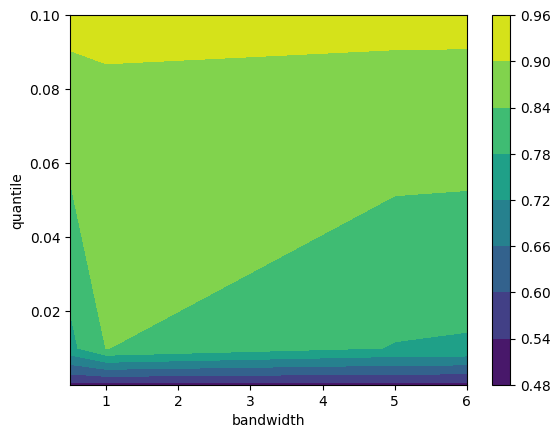

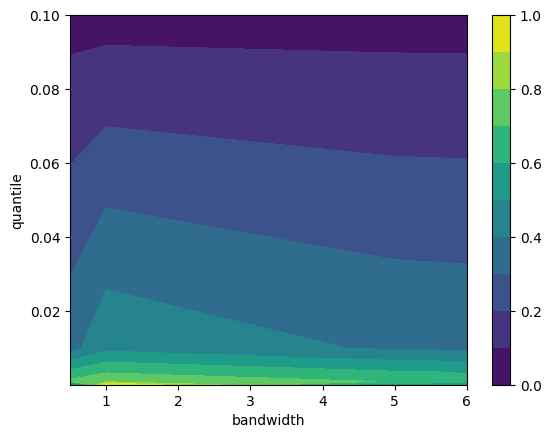

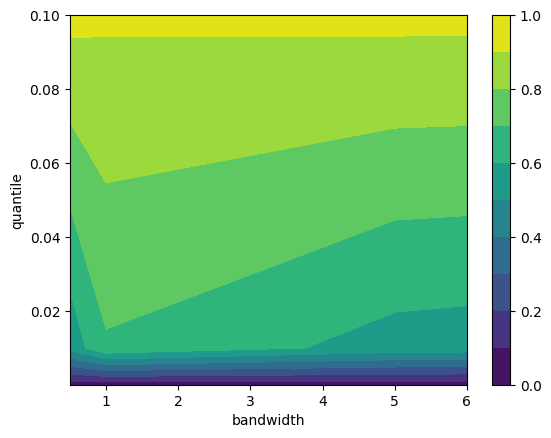

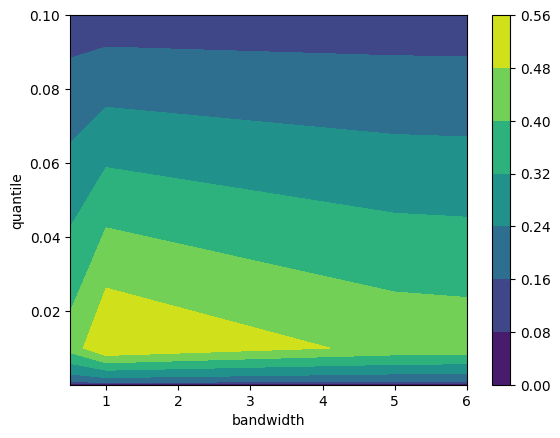

In [63]:
plot_kde(kde_gaussian_df)

In [67]:
def read_csv_kde(kernel):
    df = pd.read_csv('./kde.csv')
    df = df.drop(df[df.kernel != kernel].index)
    
    return df

kde_tophat_df = read_csv_kde('tophat')
kde_epanechnikov_df = read_csv_kde('epanechnikov')
kde_exponential_df = read_csv_kde('exponential')
kde_linear_df = read_csv_kde('linear')
kde_cosine_df = read_csv_kde('cosine')

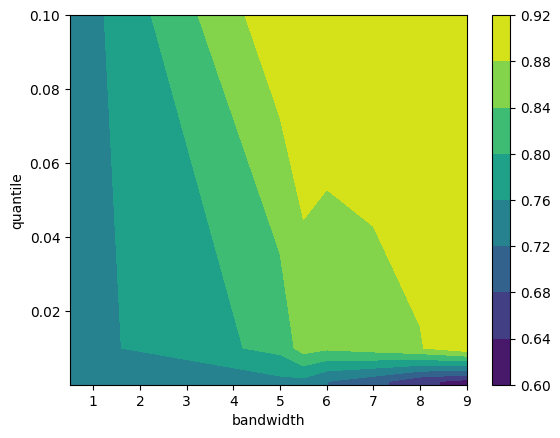

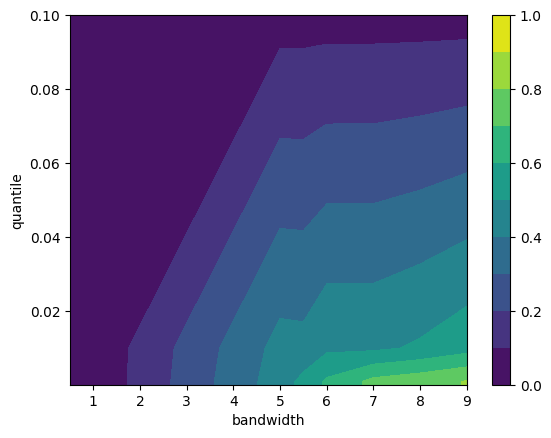

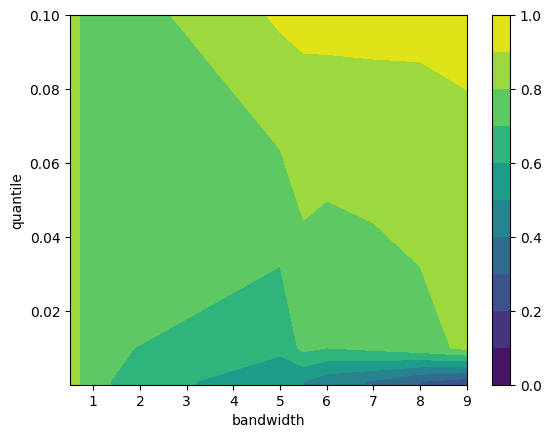

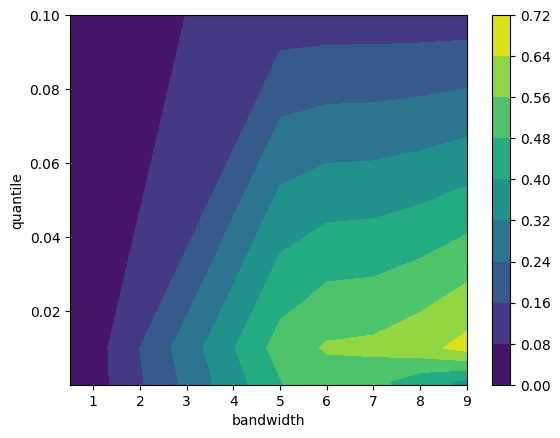

In [69]:
plot_kde(kde_tophat_df)

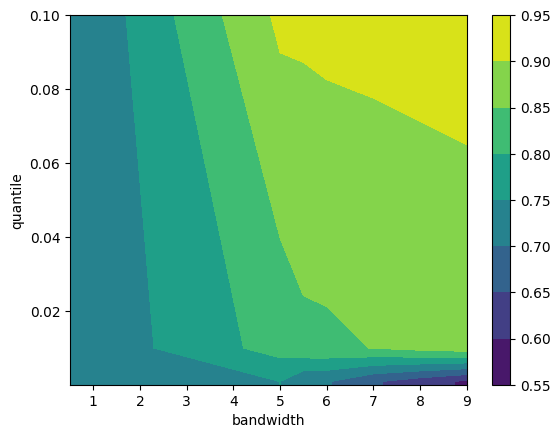

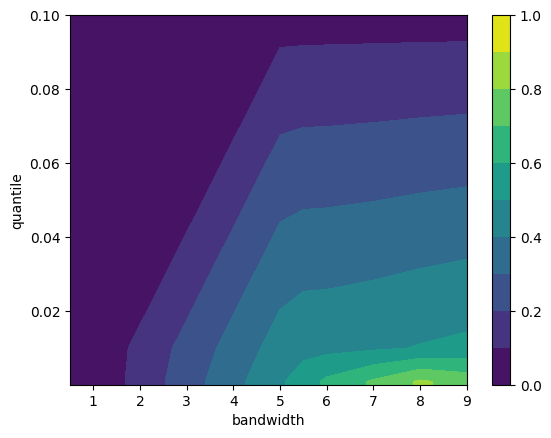

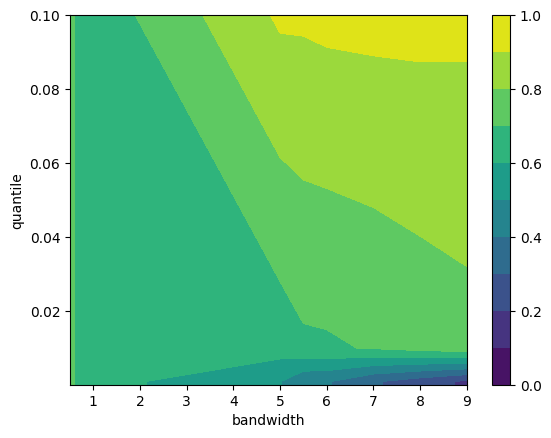

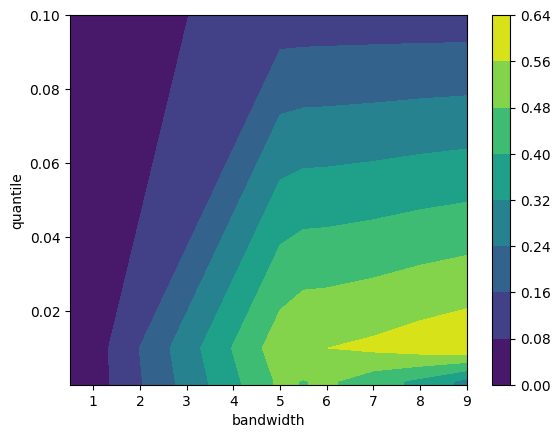

In [70]:
plot_kde(kde_epanechnikov_df)

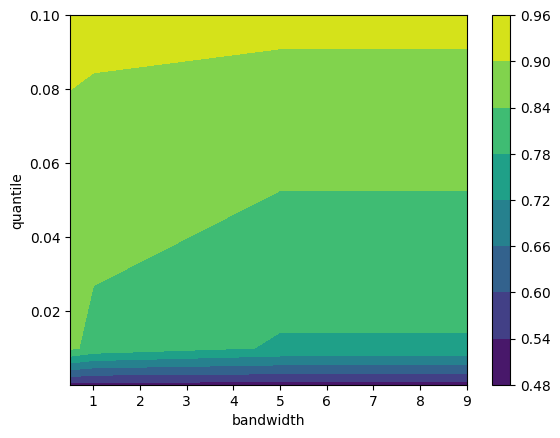

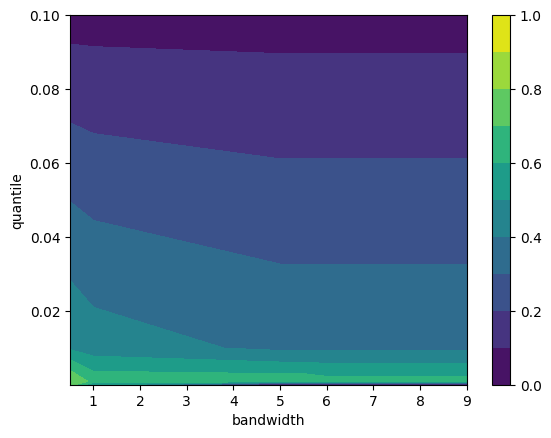

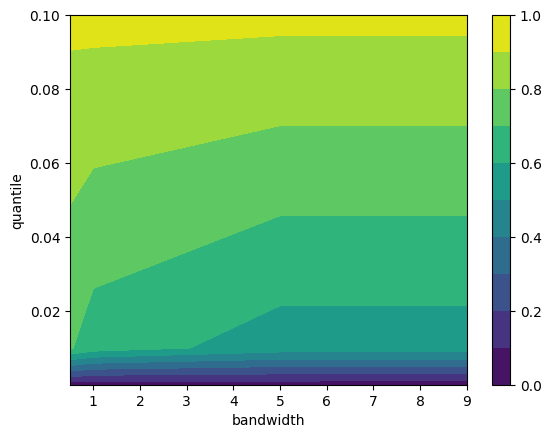

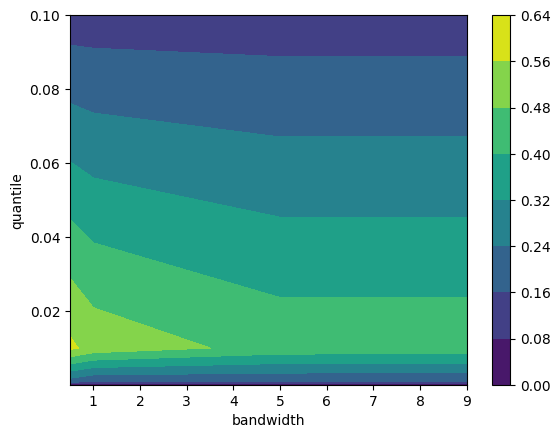

In [71]:
plot_kde(kde_exponential_df)

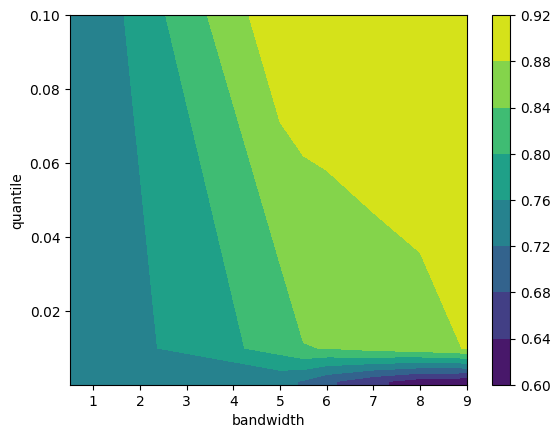

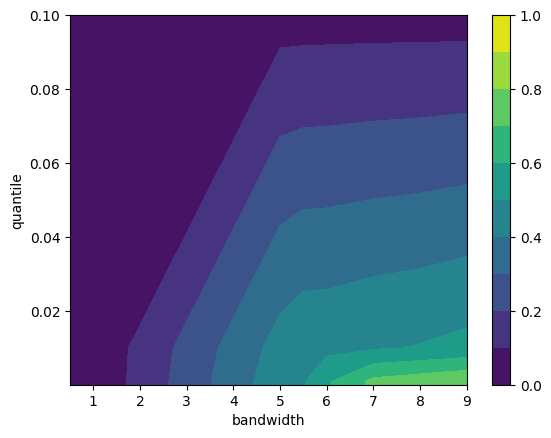

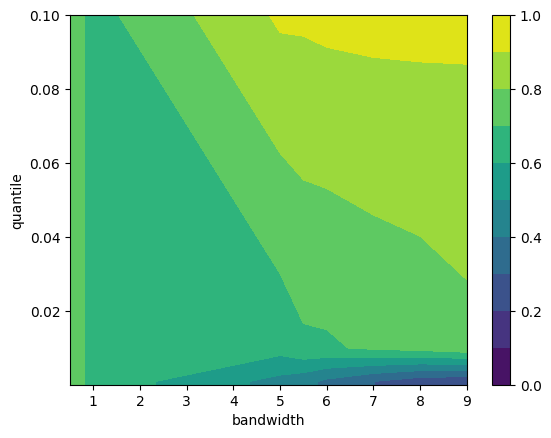

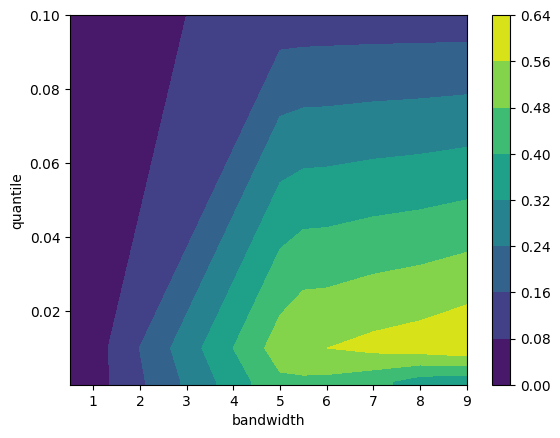

In [72]:
plot_kde(kde_linear_df)

In [73]:
plot_kde(kde_cosine_df)

ValueError: cannot reshape array of size 31 into shape (4,8)